In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'c:\Users\hp\Downloads\Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
df.drop( ['day','month','year'] ,axis=1 , inplace=True)


In [5]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df['Classes  '].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
Classes            1
not fire           1
Name: Classes  , dtype: int64

In [7]:
df.columns=df.columns.str.strip()
df.isna().mean().sort_values(ascending=False)

Classes        0.012146
FWI            0.008097
BUI            0.008097
ISI            0.008097
DC             0.008097
DMC            0.008097
FFMC           0.008097
Rain           0.008097
Ws             0.008097
RH             0.008097
Temperature    0.008097
dtype: float64

In [8]:
## encoding
df['Classes'] = np.where(
    df['Classes'].astype(str).str.contains('not fire', case=False, na=False),
    0,
    1
)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [10]:
df['Classes'].value_counts()

1    141
0    106
Name: Classes, dtype: int64

In [11]:
X=df.drop("FWI", axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0


In [13]:
y.dropna()


0      0.5
1      0.4
2      0.1
3        0
4      0.5
      ... 
242    6.5
243      0
244    0.2
245    0.7
246    0.5
Name: FWI, Length: 245, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape, X_test.shape

((185, 10), (62, 10))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1   RH           245 non-null    object
 2   Ws           245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      247 non-null    int32 
dtypes: int32(1), object(10)
memory usage: 10.7+ KB


In [17]:
# List of numeric columns
num_cols = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

# Step 1: Strip spaces and replace commas with dots
for col in num_cols:
    df[col] = df[col].astype(str).str.strip().str.replace(',', '.', regex=False)

# Step 2: Remove any non-numeric characters
import re

def keep_numbers_only(x):
    # Keep only digits and decimal point
    match = re.findall(r'\d+\.\d+|\d+', x)
    return match[0] if match else np.nan

for col in num_cols:
    df[col] = df[col].apply(keep_numbers_only)

# Step 3: Convert to float
df[num_cols] = df[num_cols].astype(float)

# Step 4: Check
print(df[num_cols].head())


   Temperature    RH    Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0         29.0  57.0  18.0   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1         29.0  61.0  13.0   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2         26.0  82.0  22.0  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3         25.0  89.0  13.0   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4         27.0  77.0  16.0   0.0  64.8  3.0  14.2  1.2  3.9  0.5


In [18]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    Int64  
 1   RH           244 non-null    Int64  
 2   Ws           244 non-null    Int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      247 non-null    int32  
dtypes: Int64(3), float64(7), int32(1)
memory usage: 21.0 KB


In [19]:
X_train[X_train.eq("Temperature").any(axis=1)]


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
124,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,1


In [20]:
X_train = X_train[X_train["Temperature"] != "Temperature"]


In [21]:
X_train = X_train.apply(
    lambda col: col.astype(str).str.replace(" ", "", regex=False)
)

X_train = X_train.apply(pd.to_numeric, errors="coerce")


In [22]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.689393,-0.321891,-0.359438,0.707745,0.490281,0.376328,0.598660,0.463008,0.529886
RH,-0.689393,1.000000,0.166559,0.244101,-0.660022,-0.410668,-0.219077,-0.732962,-0.352303,-0.457958
Ws,-0.321891,0.166559,1.000000,0.229595,-0.141418,0.015022,0.081155,0.029341,0.039326,-0.019528
Rain,-0.359438,0.244101,0.229595,1.000000,-0.557421,-0.286336,-0.294696,-0.337800,-0.295782,-0.369612
FFMC,0.707745,-0.660022,-0.141418,-0.557421,1.000000,0.614965,0.510088,0.740773,0.597772,0.783493
DMC,0.490281,-0.410668,0.015022,-0.286336,0.614965,1.000000,0.871724,0.676476,0.983552,0.598973
DC,0.376328,-0.219077,0.081155,-0.294696,0.510088,0.871724,1.000000,0.475461,0.943763,0.509896
ISI,0.598660,-0.732962,0.029341,-0.337800,0.740773,0.676476,0.475461,1.000000,0.623201,0.724304
BUI,0.463008,-0.352303,0.039326,-0.295782,0.597772,0.983552,0.943763,0.623201,1.000000,0.587112
Classes,0.529886,-0.457958,-0.019528,-0.369612,0.783493,0.598973,0.509896,0.724304,0.587112,1.000000


In [23]:
plt.figure(figsize=(12,10))
corr=X_train.corr()


<Figure size 1200x1000 with 0 Axes>

In [24]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            
    

In [25]:
corr_feature=correlation(X_train,0.85)

In [26]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

c:\Users\hp\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((184, 8), (62, 8))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
X_train_scaled


array([[ 0.18091033,  0.71998514, -1.34871966, ..., -0.9988569 ,
        -0.95996409, -1.16575056],
       [ 1.78704105, -2.7887375 ,  0.57500274, ...,  0.27897956,
         2.42143943,  0.85781645],
       [-0.62215503,  0.71998514, -0.96397518, ..., -0.95941751,
        -0.98281141, -1.16575056],
       ...,
       [-1.9605973 ,  0.92241145,  0.57500274, ..., -1.06984782,
        -1.07420069, -1.16575056],
       [ 1.78704105,  0.11270622, -2.5029531 , ..., -0.24950836,
        -0.8685748 , -1.16575056],
       [-0.62215503,  0.98988688,  2.11398066, ..., -1.02252054,
        -0.8685748 , -1.16575056]])

In [29]:
y = pd.to_numeric(y, errors="coerce")


In [30]:
import numpy as np

mask = ~np.isnan(y)

X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()
linreg = LinearRegression()

X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ligreg=LinearRegression()
ligreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

0.4123251108618585
0.9894422521436343


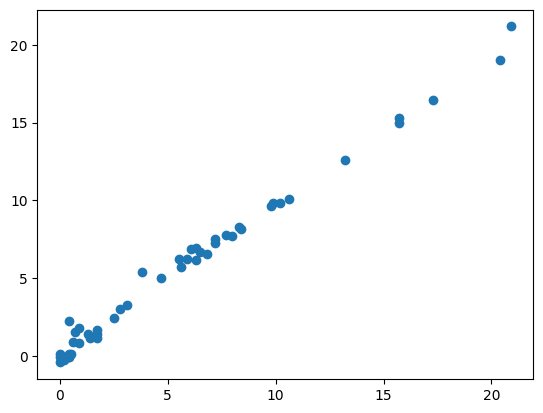

In [33]:
plt.scatter(y_test,y_pred)
plt.show()

##Lasso REgression



In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lacco=Lasso()
lacco.fit(X_train_scaled,y_train)
y_pred=lacco.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)


0.9552746314709523
0.9527917018651334


In [35]:
##riche regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

0.4600934554644246
0.9835883431264733
